In [25]:
# Import Library yang dibutuhkan

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data

store_data = pd.read_csv("/content/Store.csv")
transaction_data = pd.read_csv("/content/Transaction.csv")
product_data = pd.read_csv("/content/Product.csv")
customer_data = pd.read_csv('/content/Customer.csv')

In [9]:
# Merged Data

data_penjualan = pd.merge(transaction_data, store_data, on="StoreID", how="inner")
data_penjualan = pd.merge(data_penjualan, product_data, on="ProductID", how="inner")
data_penjualan= pd.merge(data_penjualan, customer_data, on="CustomerID", how="inner")

In [10]:
# Cek 5 data pertama
data_penjualan.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,product_name,Price_y,Age,Gender,marital_status,Income
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554",Crackers,7500,36,0,Married,"10,53"
1,TR57013,328,9/15/2022,P7,9400,6,56400,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816,666",Coffee Candy,9400,36,0,Married,"10,53"
2,TR97172,328,5/21/2022,P1,8800,5,44000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816,666",Choco Bar,8800,36,0,Married,"10,53"
3,TR67395,328,1/22/2022,P8,16000,3,48000,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447,403",Oat,16000,36,0,Married,"10,53"
4,TR45738,328,12/29/2022,P2,3200,3,9600,11,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447,403",Ginger Candy,3200,36,0,Married,"10,53"


In [11]:
# Cek nilai kosong pada data
data_penjualan.isnull().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price_x            0
Qty                0
TotalAmount        0
StoreID            0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
product_name       0
Price_y            0
Age                0
Gender             0
marital_status    44
Income             0
dtype: int64

In [12]:
# Mengisi nilai yang hilang dengan modus / nilai terbanyak yang muncul

modus= data_penjualan['marital_status'].mode()[0]
data_penjualan['marital_status'].fillna(modus, inplace=True)
data_penjualan.isnull().sum()

TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price_x           0
Qty               0
TotalAmount       0
StoreID           0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
product_name      0
Price_y           0
Age               0
Gender            0
marital_status    0
Income            0
dtype: int64

In [13]:
# Melihat informasi dari data

data_penjualan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TransactionID   5020 non-null   object
 1   CustomerID      5020 non-null   int64 
 2   Date            5020 non-null   object
 3   ProductID       5020 non-null   object
 4   Price_x         5020 non-null   int64 
 5   Qty             5020 non-null   int64 
 6   TotalAmount     5020 non-null   int64 
 7   StoreID         5020 non-null   int64 
 8   StoreName       5020 non-null   object
 9   GroupStore      5020 non-null   object
 10  Type            5020 non-null   object
 11  Latitude        5020 non-null   object
 12  Longitude       5020 non-null   object
 13  product_name    5020 non-null   object
 14  Price_y         5020 non-null   int64 
 15  Age             5020 non-null   int64 
 16  Gender          5020 non-null   int64 
 17  marital_status  5020 non-null   object
 18  Income  

In [15]:
# Merubah kolom data menjadi time-series
data_penjualan['Date'] = pd.to_datetime(data_penjualan['Date'])

# Merubah tipe data pada kolom Income dari string ke float
data_penjualan['Income'] = data_penjualan['Income'].str.replace(',', '.').astype(float)


In [16]:
# Membuat Data Time Serie
daily_data = data_penjualan.groupby('Date')['Qty'].sum().reset_index()

In [17]:
# Persiapan Data Time Series
data = daily_data.set_index('Date')
data2 = data.resample('D').sum()  # Resampling harian

In [18]:
# Melihat 5 data pertama
data2.head()

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,30


<Axes: xlabel='Date'>

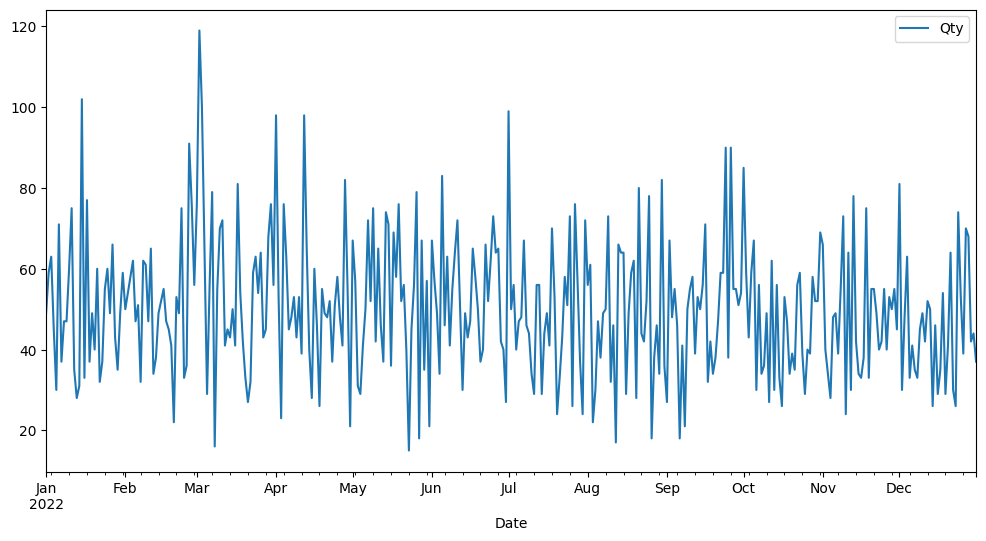

In [19]:
# Menampilkan plot dari data2
data2.plot(figsize=(12,6))

In [20]:
# Split data yang akan digunakan dalam train model
train_size = int(len(data2) * 0.8)
train_data, test_data = data2[:train_size], data2[train_size:]
print(train_data.shape, test_data.shape)

(292, 1) (73, 1)


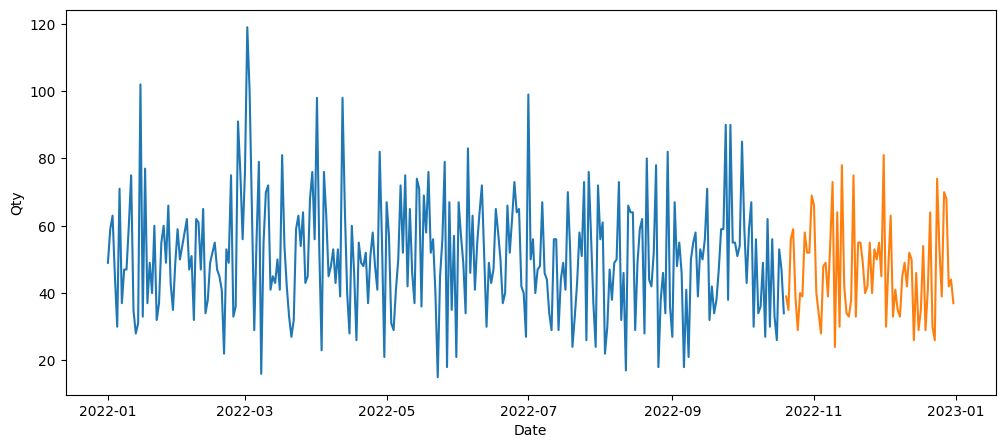

In [23]:
# Menampilkan hasil split data dalam bentuk grafik

plt.figure(figsize=(12,5))
sns.lineplot(data=train_data, x=train_data.index, y=train_data['Qty'])
sns.lineplot(data=test_data, x=test_data.index, y=test_data['Qty'])
plt.show()


In [24]:
# Pelatihan model menggunakan metode ARIMA
from statsmodels.tsa.arima.model import ARIMA


# Langkah 1: Tentukan nilai p, d, dan q
p = 2  # Order of Autoregression
d = 2  # Degree of Differencing
q = 2  # Order of Moving Average

# Langkah 2: Buat model ARIMA dengan parameter yang telah ditentukan
model = ARIMA(train_data, order=(p, d, q))

# Langkah 3: Latih model menggunakan data pelatihan
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [26]:
# Menghitung index awal dan index akhir untuk melakukan prediksi
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, dynamic=False)

# Evaluasi performa
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 286.7189174570558


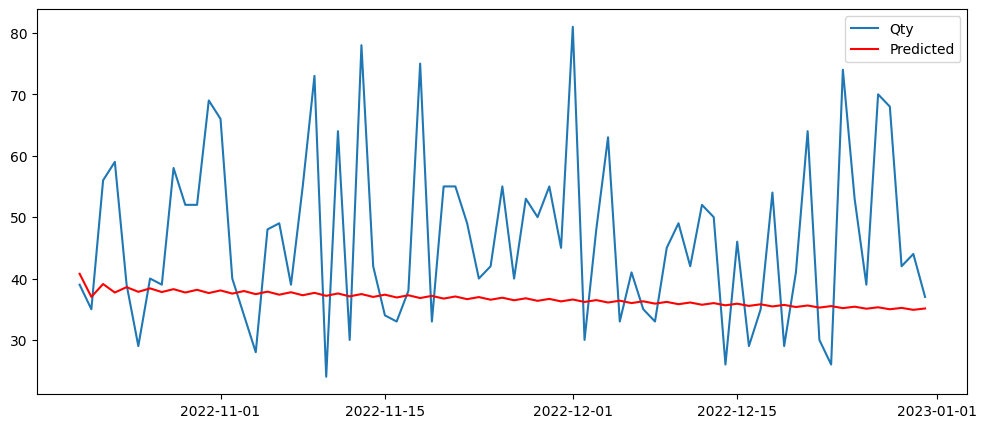

In [27]:
# Menampilkan plot hasil prediksi berdasarkan Quantity
plt.figure(figsize=(12,5))
plt.plot(test_data, label='Qty')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()

In [29]:
# Mengelompokkan data penjualan berdasarkan 'CustomerID' dan melakukan agregasi
aggregated = data_penjualan.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

aggregated

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [30]:
# Persiapan Data untuk Clustering
X = aggregated[['TransactionID', 'Qty', 'TotalAmount']]


In [34]:
# Menentukan jumlah cluster yang digunakan
n_clusters = 5

# Membuat model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Melakukan klastering pada data
X['cluster'] = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


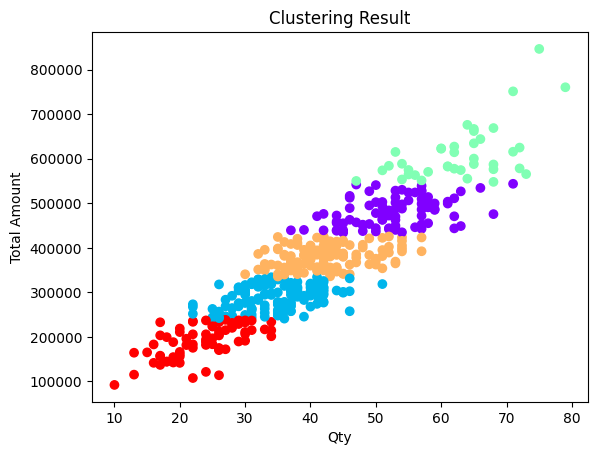

In [37]:
# Menampilkan Hasil Clustering
import matplotlib.pyplot as plt

plt.scatter(aggregated['Qty'], aggregated['TotalAmount'], c=X['cluster'], cmap='rainbow')
plt.xlabel('Qty')
plt.ylabel('Total Amount')
plt.title('Clustering Result')
plt.show()


In [38]:
# Membuat sebuah list kosong untuk menyimpan nilai WCSS
wcss= []

# Loop dari 1 hingga 10 untuk mencoba berbagai jumlah kluster
for n in range (1,11):
    model1 = KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=100, tol =0.0001, random_state = 100)
    model1.fit(X)

    # Menghitung dan menyimpan nilai WCSS ke dalam list
    wcss.append(model1.inertia_)
print(wcss)

[6928031860484.109, 2434662707280.5703, 1233416631261.4473, 776512017712.7112, 504081360603.5857, 382121221246.5902, 277934833471.3328, 212853440946.54828, 171266010473.31396, 137780280725.15384]


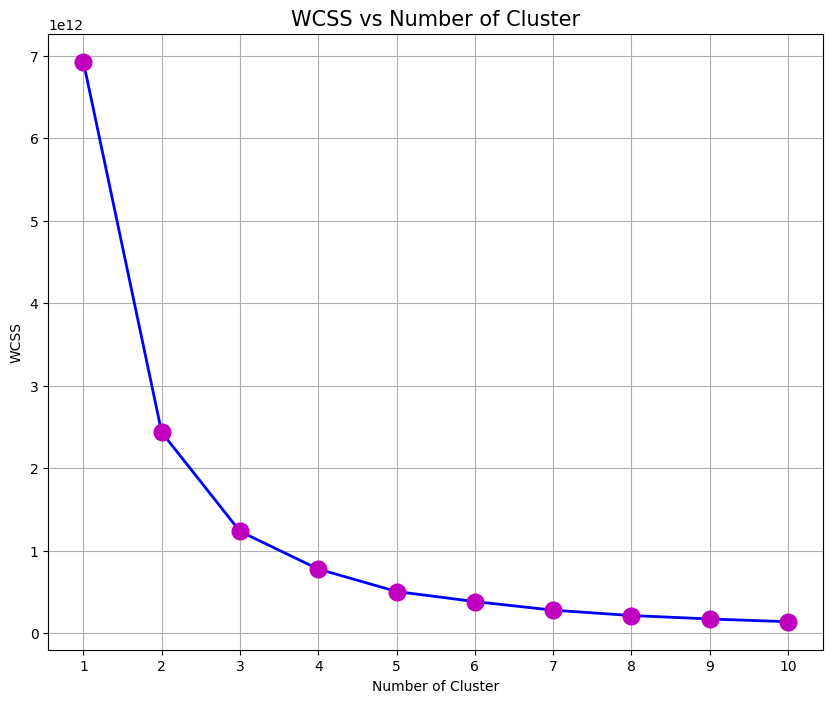

In [39]:
# Perubahan nilai WCSS terhadap pertambahan nilai CLuster

plt.figure(figsize=(10,8))
plt.plot(list(range(1,11)), wcss, color = 'blue', marker = 'o', linewidth=2, markersize=12, markerfacecolor= 'm',
         markeredgecolor= 'm')
plt.title('WCSS vs Number of Cluster', fontsize = 15)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.grid()
plt.show()

In [40]:
# Membangun model cluster, labe, dan titik koordinat untuk analisa lebih lanjut

model1 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model1.fit(X)
labels1=model1.labels_
centroids1 =model1.cluster_centers_


In [ ]:
# Membuang kolom customerID pada dataset
df_cluster = aggregated.drop(columns = ['CustomerID'])
df_cluster.head()

In [42]:
# Menambahkan kolom cluster ke dataset
df_cluster['cluster'] = model1.labels_
df_cluster.head()

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,0
1,13,57,392300,2
2,15,56,446200,2
3,10,46,302500,1
4,7,27,268600,1


<Figure size 600x600 with 0 Axes>

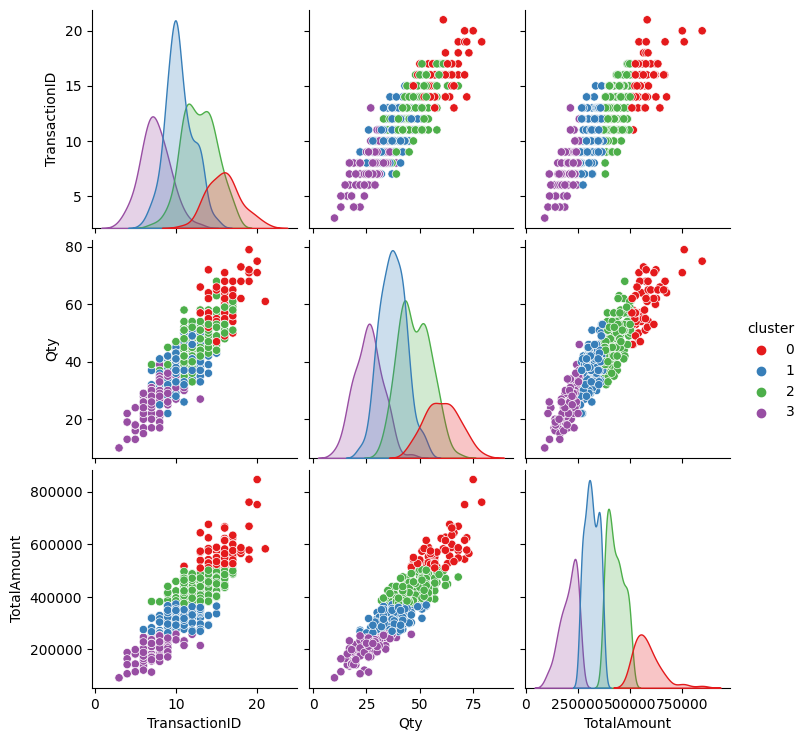

In [43]:
#Menampilkan plot hasil clustering

plt.figure(figsize=(6,6))
sns.pairplot(data=df_cluster,hue='cluster',palette='Set1')
plt.show()

In [44]:
# Meringkasan data kluster dengan jumlah pelanggan dalam setiap kluster,
# serta nilai rata-rata dari kolom 'TransactionID', 'Qty', dan 'TotalAmount

df_cluster['CustomerID'] = aggregated['CustomerID']
df_cluster_mean = df_cluster.groupby('cluster').agg({'CustomerID':'count','TransactionID':'mean','Qty':'mean','TotalAmount':'mean'})
df_cluster_mean.sort_values('CustomerID', ascending = False)

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
1,152,10.414474,37.263158,316792.763158
2,140,12.871429,47.521429,431575.000000
3,98,7.448980,25.867347,206380.612245
0,57,15.877193,60.421053,583240.350877


In [ ]:
# ## Kesimpulan

# ### Cluster 1
# - Cluster dengan jumlah pelanggan paling banyak.
# - Karakteristik dari cluster ini adalah cluster menempati posisi ketiga dari setiap metrik (transaction, quantity, total amount).
#
# Rekomendasi:
# - Membangun hubungan baik dengan pelanggan.
# - Melakukan survei untuk mengembangkan minat pelanggan terbanyak.

# ### Cluster 2
# - Karakteristik pelanggan yang menempati posisi kedua tertinggi pada setiap metrik.
#
# Rekomendasi:
#
# - Memberikan promo secara rutin untuk meningkatkan transaksi.
# - Melakukan peningkatan penjualan produk dengan harga tinggi.

# ### Cluster 3
# - Karakteristik pelanggan dengan nilai terendah pada setiap metriknya.
#
# Rekomendasi:
#
# - Memberikan diskon yang signifikan untuk meningkatkan transaksi pelanggan.
# - Menawarkan promo pada transaksi dengan jumlah barang yang lebih tinggi.
# - Melakukan survei untuk mengidentifikasi potensi pengembangan produk.

# ### Cluster 0
# - Cluster dengan jumlah pelanggan paling sedikit.
# - Karakteristik pelanggan dengan nilai tertinggi pada setiap metriknya.
#
# Rekomendasi:
#
# - Menawarkan program promo loyalitas untuk mempertahankan transaksi.
# - Melakukan survei kepuasan pelanggan.
# - Mendorong peningkatan penjualan produk dengan harga lebih tinggi.
